In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('Tadawul All Share Historical Data.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 23, 2020","5,990.23","6,171.91","6,173.11","5,974.78",190.44M,-2.94%
1,"Mar 22, 2020","6,171.91","6,267.56","6,284.40","6,159.21",165.16M,-1.53%
2,"Mar 19, 2020","6,267.56","6,154.85","6,347.89","6,105.16",359.73M,1.83%
3,"Mar 18, 2020","6,154.85","6,107.05","6,235.30","6,097.61",226.12M,0.78%
4,"Mar 17, 2020","6,107.05","5,959.69","6,182.01","5,971.61",258.60M,2.47%


In [3]:
df['Date'] = pd.to_datetime(df['Date']).dt.date
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-03-23,"5,990.23","6,171.91","6,173.11","5,974.78",190.44M,-2.94%
1,2020-03-22,"6,171.91","6,267.56","6,284.40","6,159.21",165.16M,-1.53%
2,2020-03-19,"6,267.56","6,154.85","6,347.89","6,105.16",359.73M,1.83%
3,2020-03-18,"6,154.85","6,107.05","6,235.30","6,097.61",226.12M,0.78%
4,2020-03-17,"6,107.05","5,959.69","6,182.01","5,971.61",258.60M,2.47%


In [4]:
data = df.copy()

In [5]:
data = data.drop(['Change %'], axis=1)

In [6]:
data['Price'] = data['Price'].str.replace(',', '')
data['Price'] = data['Price'].astype(float)
data.head()

,Date,Price,Open,High,Low,Vol.
0,2020-03-23,5990.23,"6,171.91","6,173.11","5,974.78",190.44M
1,2020-03-22,6171.91,"6,267.56","6,284.40","6,159.21",165.16M
2,2020-03-19,6267.56,"6,154.85","6,347.89","6,105.16",359.73M
3,2020-03-18,6154.85,"6,107.05","6,235.30","6,097.61",226.12M
4,2020-03-17,6107.05,"5,959.69","6,182.01","5,971.61",258.60M


In [7]:
group = data.groupby('Date')
Real_Price = group['Price'].mean()

In [8]:
Real_Price

Date
2010-02-23    6471.84
2010-02-24    6465.69
2010-02-27    6473.05
2010-02-28    6437.50
2010-03-01    6424.24
               ...   
2020-03-17    6107.05
2020-03-18    6154.85
2020-03-19    6267.56
2020-03-22    6171.91
2020-03-23    5990.23
Name: Price, Length: 2537, dtype: float64

In [9]:
pred_days = 30

train_data = Real_Price[:len(Real_Price)-pred_days]
test_data = Real_Price[len(Real_Price)-pred_days:]

In [10]:
training_set = train_data.values
training_set = np.reshape(training_set, (len(training_set), 1))
scaler = MinMaxScaler()
training_set = scaler.fit_transform(training_set)
x_train = training_set[0:len(training_set)-1]
x_train = np.reshape(x_train, (len(x_train), 1, 1))
y_train = training_set[1:len(training_set)]

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(4, input_shape=(None, 1), activation='sigmoid'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
             loss='mean_squared_error')

In [12]:
model.fit(x_train, 
         y_train,
         epochs=100,
         batch_size=16,
         verbose=2)

Train on 2506 samples
Epoch 1/100
2506/2506 - 1s - loss: 0.2121
Epoch 2/100
2506/2506 - 0s - loss: 0.0519
Epoch 3/100
2506/2506 - 0s - loss: 0.0300
Epoch 4/100
2506/2506 - 0s - loss: 0.0277
Epoch 5/100
2506/2506 - 0s - loss: 0.0262
Epoch 6/100
2506/2506 - 0s - loss: 0.0246
Epoch 7/100
2506/2506 - 0s - loss: 0.0229
Epoch 8/100
2506/2506 - 0s - loss: 0.0211
Epoch 9/100
2506/2506 - 0s - loss: 0.0192
Epoch 10/100
2506/2506 - 0s - loss: 0.0172
Epoch 11/100
2506/2506 - 0s - loss: 0.0153
Epoch 12/100
2506/2506 - 0s - loss: 0.0133
Epoch 13/100
2506/2506 - 0s - loss: 0.0114
Epoch 14/100
2506/2506 - 0s - loss: 0.0096
Epoch 15/100
2506/2506 - 0s - loss: 0.0079
Epoch 16/100
2506/2506 - 0s - loss: 0.0063
Epoch 17/100
2506/2506 - 0s - loss: 0.0049
Epoch 18/100
2506/2506 - 0s - loss: 0.0037
Epoch 19/100
2506/2506 - 0s - loss: 0.0027
Epoch 20/100
2506/2506 - 0s - loss: 0.0019
Epoch 21/100
2506/2506 - 0s - loss: 0.0013
Epoch 22/100
2506/2506 - 0s - loss: 9.0963e-04
Epoch 23/100
2506/2506 - 0s - loss: 6

In [13]:
test_set = test_data.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = scaler.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
prediction = model.predict(inputs)
prediction = scaler.inverse_transform(prediction)
prediction

array([[7895.503 ],
       [7915.619 ],
       [7873.849 ],
       [7835.656 ],
       [7871.952 ],
       [7858.0605],
       [7968.911 ],
       [8009.5063],
       [7984.5723],
       [7744.0522],
       [7755.313 ],
       [7707.395 ],
       [7623.1177],
       [7335.6636],
       [7339.802 ],
       [7550.08  ],
       [7517.546 ],
       [7459.6997],
       [6835.1245],
       [6314.5264],
       [6751.462 ],
       [6545.0757],
       [6354.713 ],
       [6287.3604],
       [5974.876 ],
       [6114.531 ],
       [6160.144 ],
       [6268.281 ],
       [6176.46  ],
       [6003.6973]], dtype=float32)

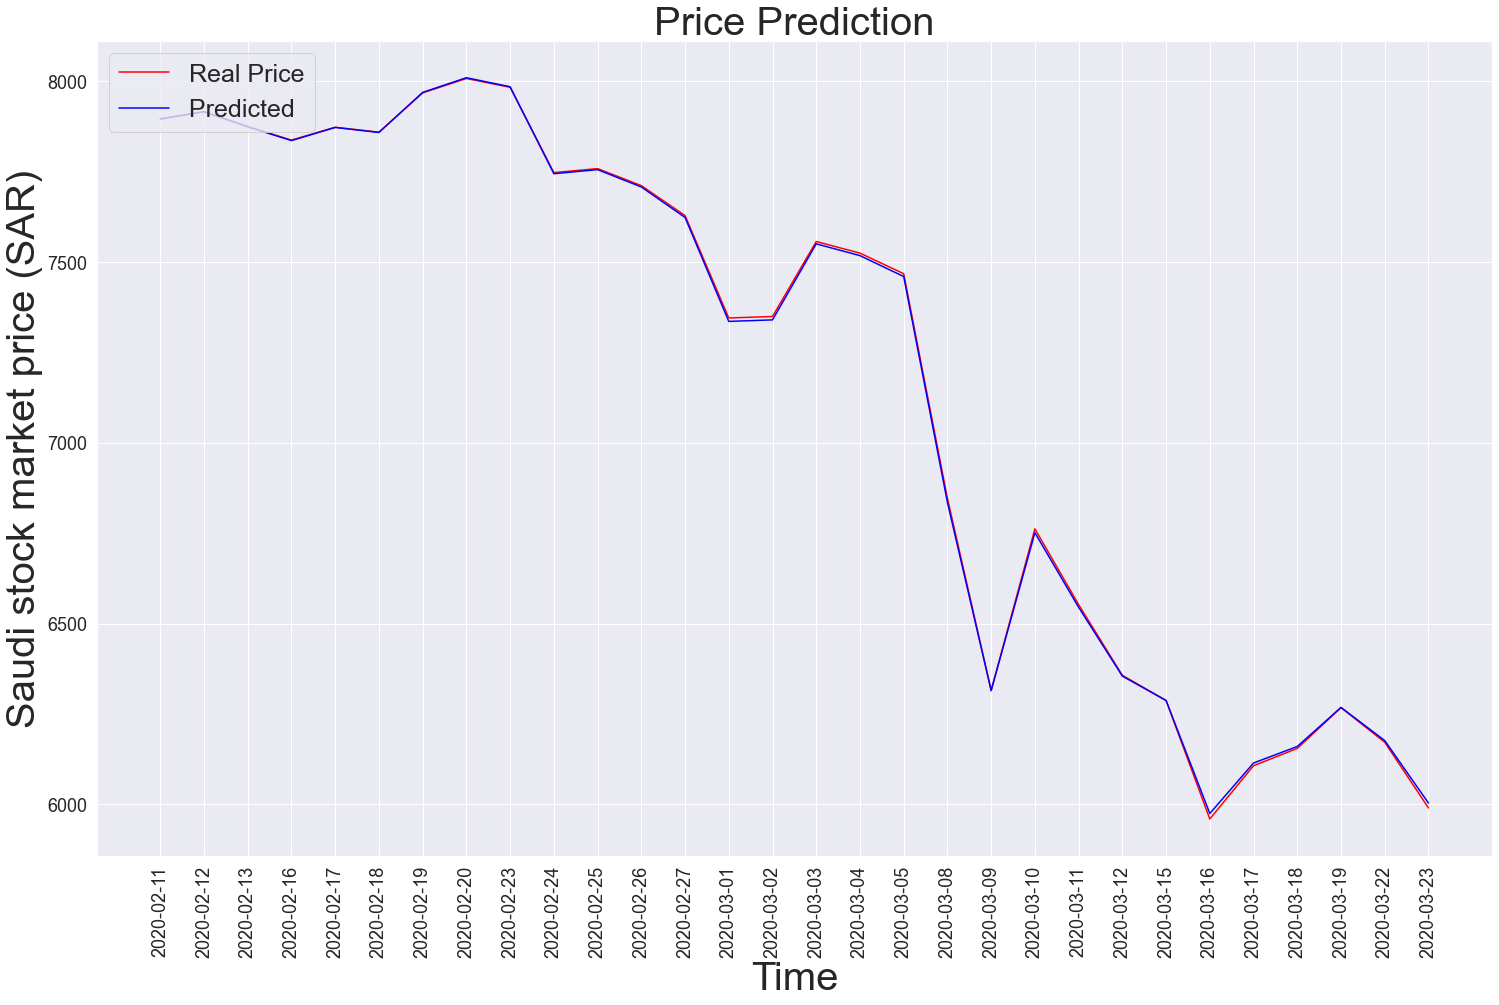

In [14]:
plt.figure(figsize=(25,15)) 
ax = plt.gca() 
plt.plot(test_set, color = 'red', label = 'Real Price')
plt.plot(prediction, color = 'blue', label = 'Predicted ')
plt.title('Price Prediction', fontsize=40)
df_test = test_data.reset_index()
x=df_test.index
labels = df_test['Date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('Saudi stock market price (SAR)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

In [15]:
test = test_data.values
test = np.reshape(test_set, (len(test_set), 1))
test = scaler.transform(test)
x_test = test[0:len(test)-1]
x_test = np.reshape(x_test, (len(x_test), 1, 1))
y_test = test[1:len(test)]

In [16]:
model.evaluate(x_test, y_test)

29/29 [==============================] - 0s 4ms/sample - loss: 0.0013


0.001340423827059567